In [253]:
library(Seurat)
library(RColorBrewer)
library(viridis)
library(EnsDb.Mmusculus.v79)   
library(slingshot)
library(ggplot2)
library(matrixStats)
library(patchwork)

## Download data

In [ ]:
# Xie et al
#! wget -P ../data https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4081nnn/GSM4081545/suppl/GSM4081545_wt_ctl_bm1.txt.gz
#! wget -P ../data https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4081nnn/GSM4081546/suppl/GSM4081546_wt_ctl_bm2.txt.gz

## Process Xie et al data

In [2]:
# xie
# data1 - BM cKit and Gr
data1 = read.table("../intermediate_files/GSM4081545_wt_ctl_bm1.txt.gz", header=TRUE, sep=' ')
data1 <- CreateSeuratObject(counts = data1, min.cells = 3, min.features = 200, project = "data1")
data1 <- NormalizeData(data1, normalization.method = "LogNormalize", scale.factor = 100000)

# data2 - BM Gr
data2 = read.table("../intermediate_files/GSM4081546_wt_ctl_bm2.txt.gz", header=TRUE, sep=' ')
data2 <- CreateSeuratObject(counts = data2, min.cells = 3, min.features = 200, project = "data2")
data2 <- NormalizeData(data2, normalization.method = "LogNormalize", scale.factor = 100000)

In [4]:
# integrate the two datasets
# using anchors
anchors <- FindIntegrationAnchors(object.list = c(data1, data2), dims = 1:30)
to_integrate = Reduce(intersect, lapply(c(data1, data2), rownames))
data.integrated <- IntegrateData(anchorset = anchors, features.to.integrate = to_integrate, dims = 1:30)  # to integrate all genes

DefaultAssay(data.integrated) <- "integrated"
data.integrated <- ScaleData(data.integrated, verbose = FALSE)
data.integrated <- RunPCA(data.integrated, npcs = 30, verbose = FALSE)
data.integrated <- FindNeighbors(data.integrated, dims = 1:10)
data.integrated <- FindClusters(data.integrated, resolution = 0.5)
data.integrated <- RunUMAP(data.integrated, reduction = "pca", dims = 1:30)

Warning message in CheckDuplicateCellNames(object.list = object.list):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Computing 2000 integration features

No variable features found for object1 in the object.list. Running FindVariableFeatures ...

No variable features found for object2 in the object.list. Running FindVariableFeatures ...

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 8606 anchors

Filtering anchors

	Retained 4420 anchors

Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10239
Number of edges: 343311

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9278
Number of communities: 18
Elapsed time: 1 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
11:23:27 UMAP embedding parameters a = 0.9922 b = 1.112

11:23:27 Read 10239 rows and found 30 numeric columns

11:23:27 Using Annoy for neighbor search, n_neighbors = 30

11:23:27 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:23:29 Writing NN index file to temp file /tmp/RtmpAwUKxL/file609332d15e44

11:23:29 Searching Annoy index using 1 thread, search_k = 3000

11:23:33 Annoy recall = 100%

11:23:34 Commencing smooth kNN distance calibration using 1 thread

11:23:35 Initializing fr

null device 
          1

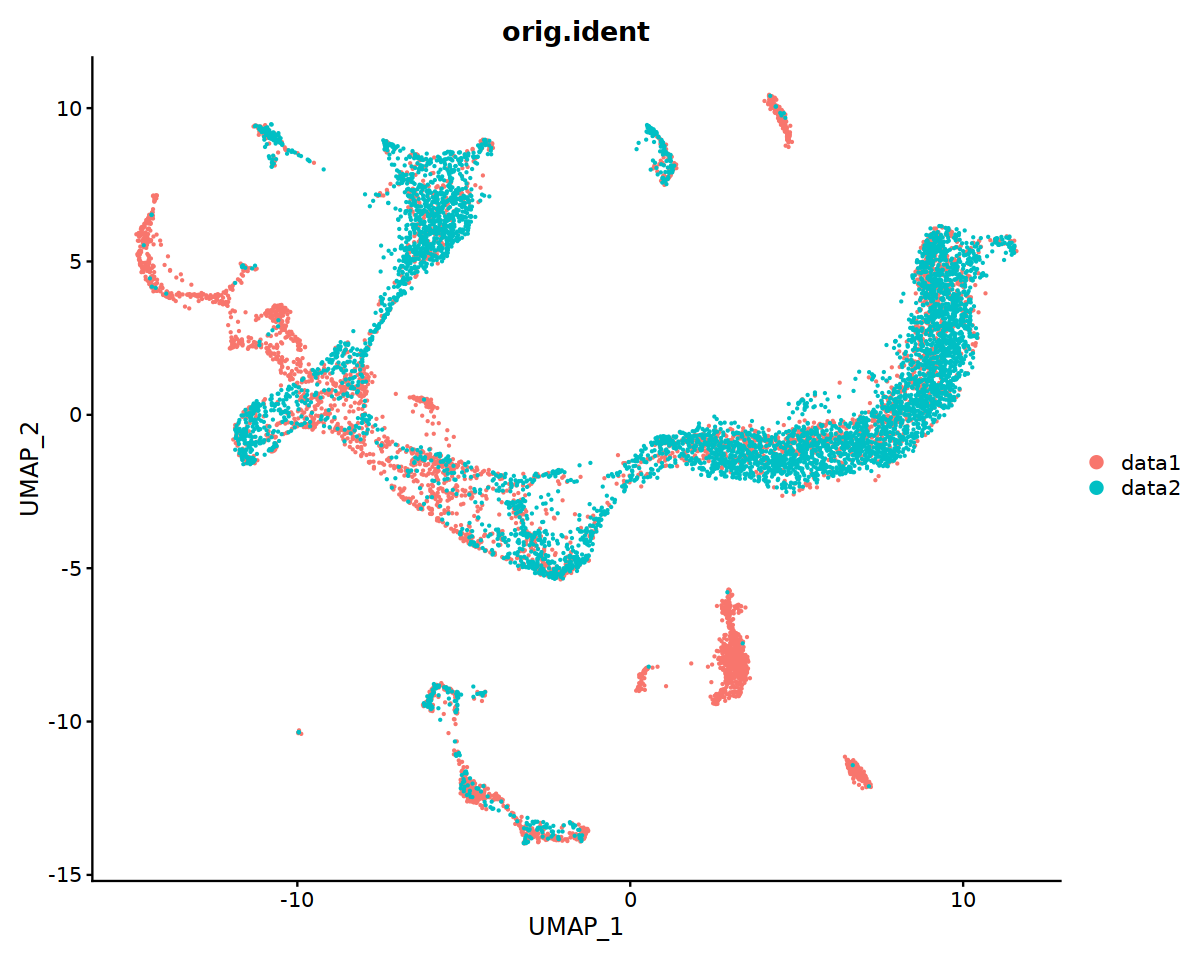

In [5]:
options(repr.plot.width=10, repr.plot.height=8)
DimPlot(data.integrated, reduction = "umap", group.by = "orig.ident")
dev.off()

null device 
          1

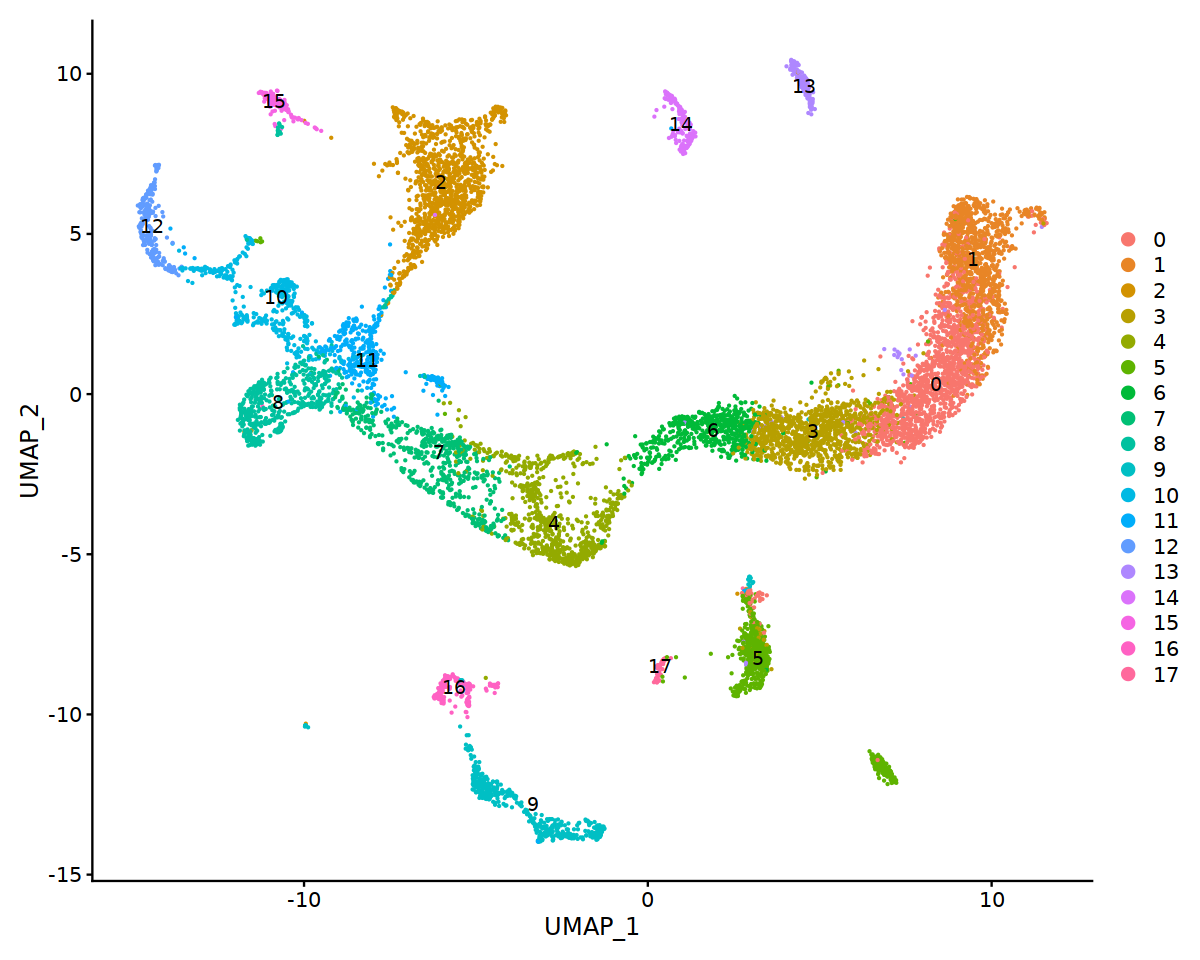

In [6]:
options(repr.plot.width=10, repr.plot.height=8)
DimPlot(data.integrated, reduction = "umap", label=TRUE)
dev.off()

null device 
          1

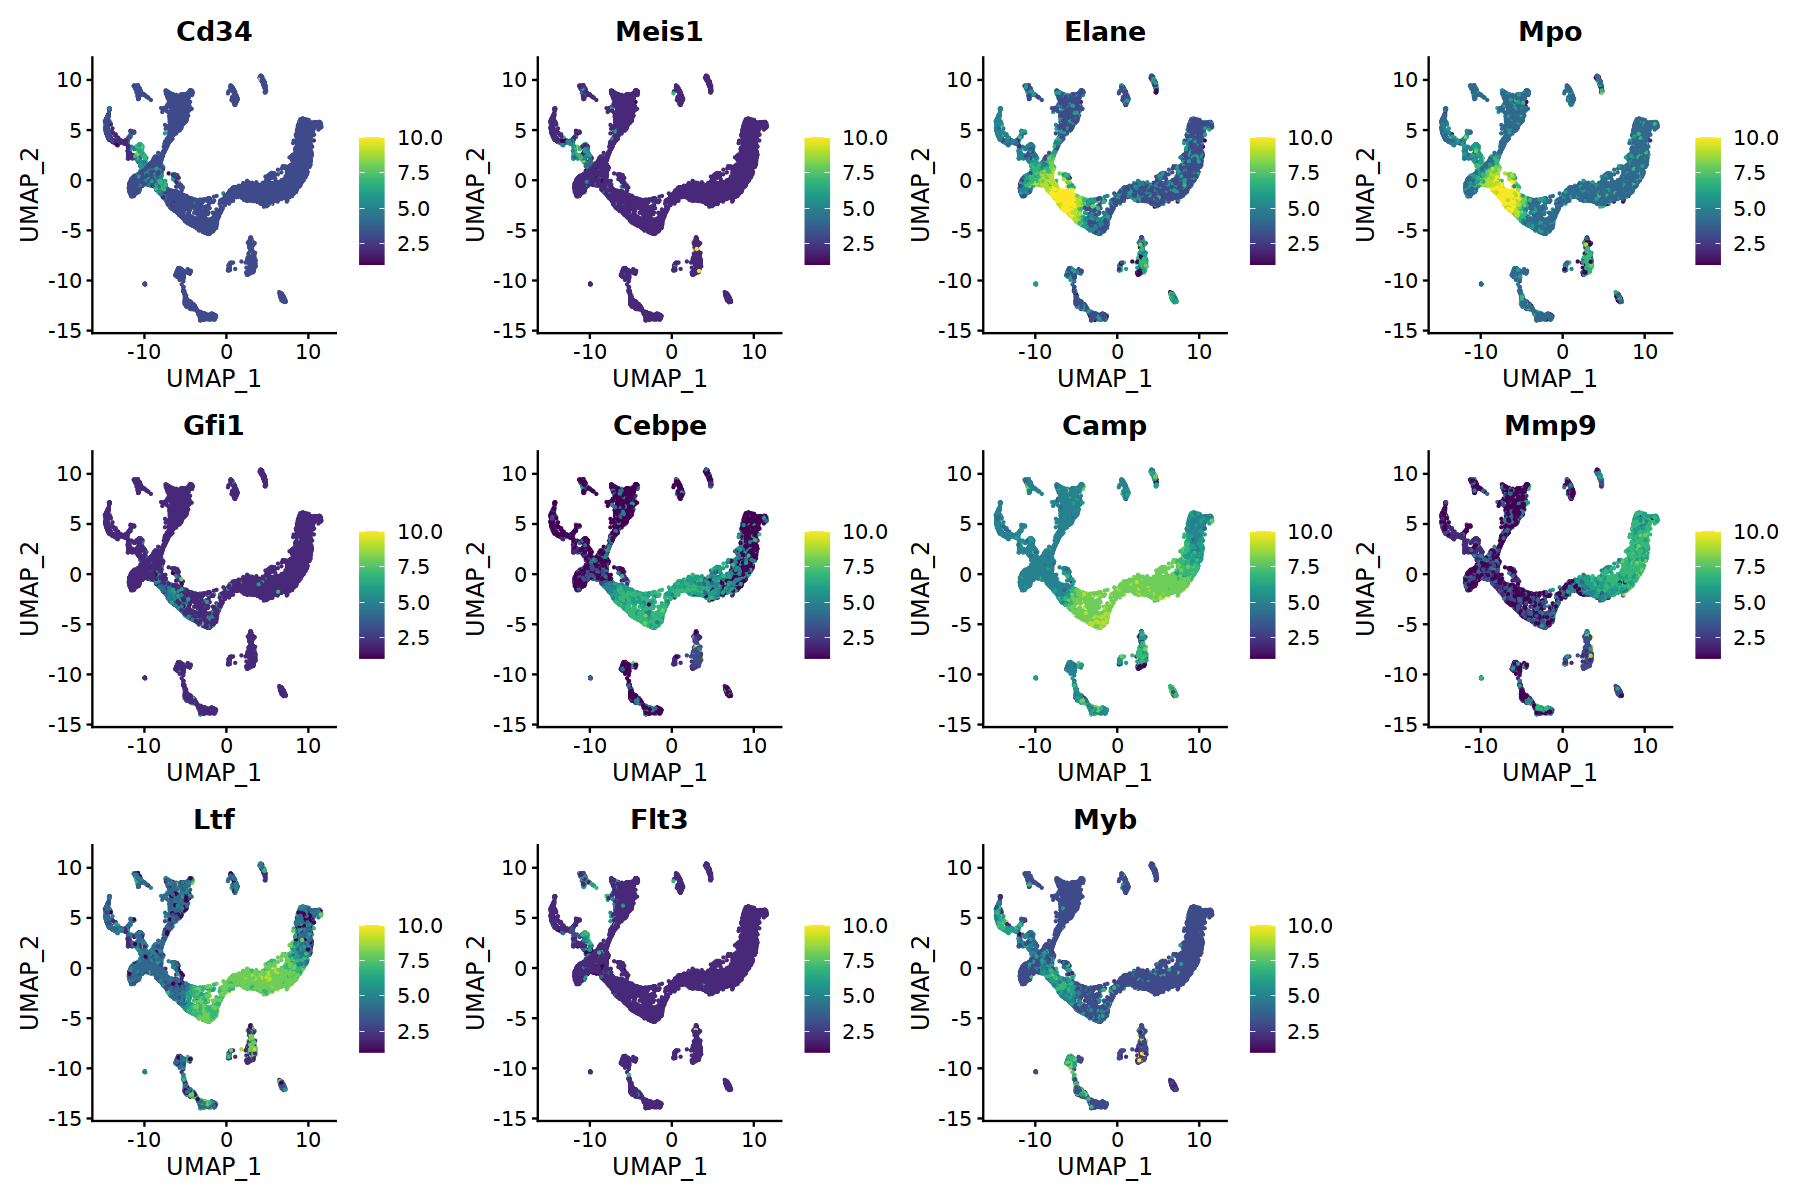

In [39]:
options(repr.plot.width=15, repr.plot.height=10)
FeaturePlot(data.integrated, c("Cd34", "Meis1", "Elane", "Mpo", "Gfi1", "Cebpe", "Camp", "Mmp9", "Ltf", "Flt3", "Myb"), 
            col=viridis(10))
dev.off()

In [40]:
neutrophils = subset(data.integrated, idents = c(0,1,3,6,4,7,10))
neutrophils <- RunPCA(neutrophils, npcs = 30, verbose = FALSE)

neutrophils <- FindNeighbors(neutrophils, dims = 1:10)
neutrophils <- FindClusters(neutrophils, resolution = 0.5)
neutrophils <- RunUMAP(neutrophils, reduction = "pca", dims = 1:30)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6000
Number of edges: 212341

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8889
Number of communities: 10
Elapsed time: 0 seconds


16:00:03 UMAP embedding parameters a = 0.9922 b = 1.112

16:00:03 Read 6000 rows and found 30 numeric columns

16:00:03 Using Annoy for neighbor search, n_neighbors = 30

16:00:03 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:00:04 Writing NN index file to temp file /tmp/RtmpAwUKxL/file60936126315b

16:00:04 Searching Annoy index using 1 thread, search_k = 3000

16:00:07 Annoy recall = 100%

16:00:07 Commencing smooth kNN distance calibration using 1 thread

16:00:08 Initializing from normalized Laplacian + noise

16:00:08 Commencing optimization for 500 epochs, with 263192 positive edges

16:00:34 Optimization finished



null device 
          1

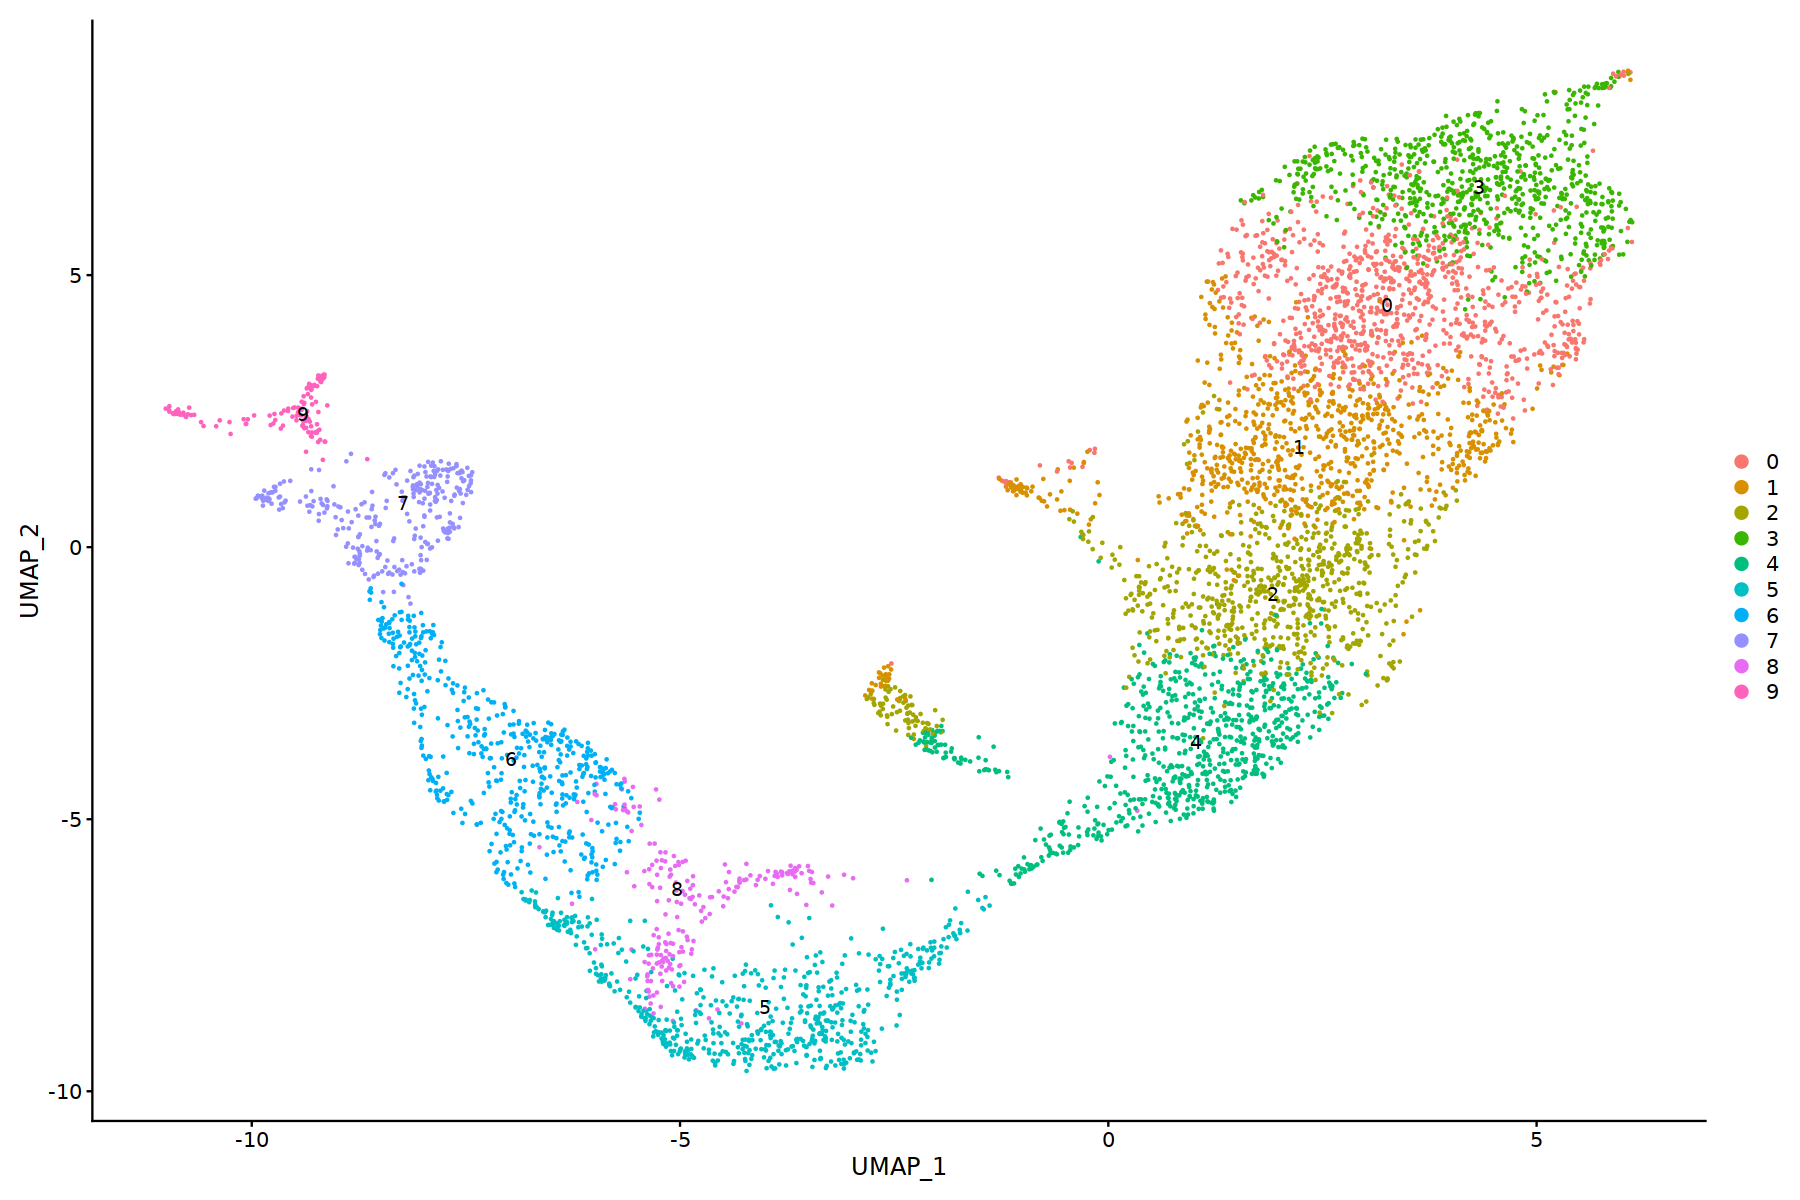

In [41]:
DimPlot(neutrophils, reduction = "umap", label=TRUE)
dev.off()

In [42]:
cluster7.markers <- FindMarkers(neutrophils, ident.1 = 7, min.pct = 0.5, logfc.threshold = 2)
head(cluster7.markers, n = 10)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mpl,0.000000e+00,2.927424,0.941,0.021,0.000000e+00
Gm19590,0.000000e+00,2.842632,0.916,0.021,0.000000e+00
1500009L16Rik,0.000000e+00,2.093417,0.881,0.019,0.000000e+00
Gimap1,4.143584e-272,4.085703,0.937,0.080,5.607926e-268
Calhm2,6.295313e-266,2.169317,0.990,0.155,8.520076e-262
Myl10,1.637521e-258,4.072113,0.930,0.067,2.216221e-254
Dntt,8.564381e-238,3.435825,0.930,0.114,1.159103e-233
Mfng,4.260366e-233,2.531824,0.948,0.107,5.765979e-229
Fam213a,6.100111e-221,2.120003,0.878,0.033,8.255891e-217


In [43]:
cluster9.markers <- FindMarkers(neutrophils, ident.1 = 9, min.pct = 0.5, logfc.threshold = 2)
head(cluster9.markers, n = 10)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Il6,0.000000e+00,3.754325,0.991,0.023,0.000000e+00
Cd200r3,3.471388e-252,4.521131,0.949,0.080,4.698177e-248
Pdzk1ip1,4.158543e-195,2.118899,0.974,0.032,5.628173e-191
Fcer1a,5.956507e-195,4.754678,1.000,0.068,8.061536e-191
St8sia6,3.632365e-186,2.705927,0.880,0.023,4.916043e-182
Rec114,1.769291e-170,2.509301,0.829,0.044,2.394559e-166
Csrp3,9.354169e-170,4.697614,0.966,0.024,1.265993e-165
F2r,2.321641e-152,3.489375,0.846,0.018,3.142109e-148
Tbc1d4,2.274459e-132,2.059649,0.974,0.028,3.078252e-128


In [44]:
cluster6.markers <- FindMarkers(neutrophils, ident.1 = 6, min.pct = 0.5, logfc.threshold = 2)
head(cluster6.markers, n = 10)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cst7,0,3.718831,0.984,0.128,0
Gstm1,0,3.913162,0.996,0.241,0
Dmkn,0,3.458843,0.918,0.141,0
Nkg7,0,4.377102,0.996,0.222,0
Prtn3,0,5.521859,1.000,0.395,0
Elane,0,6.363340,1.000,0.507,0
Mt1,0,4.143208,0.984,0.136,0
Ctsg,0,5.282414,0.990,0.268,0
Mgl2,0,2.373433,0.877,0.140,0


null device 
          1

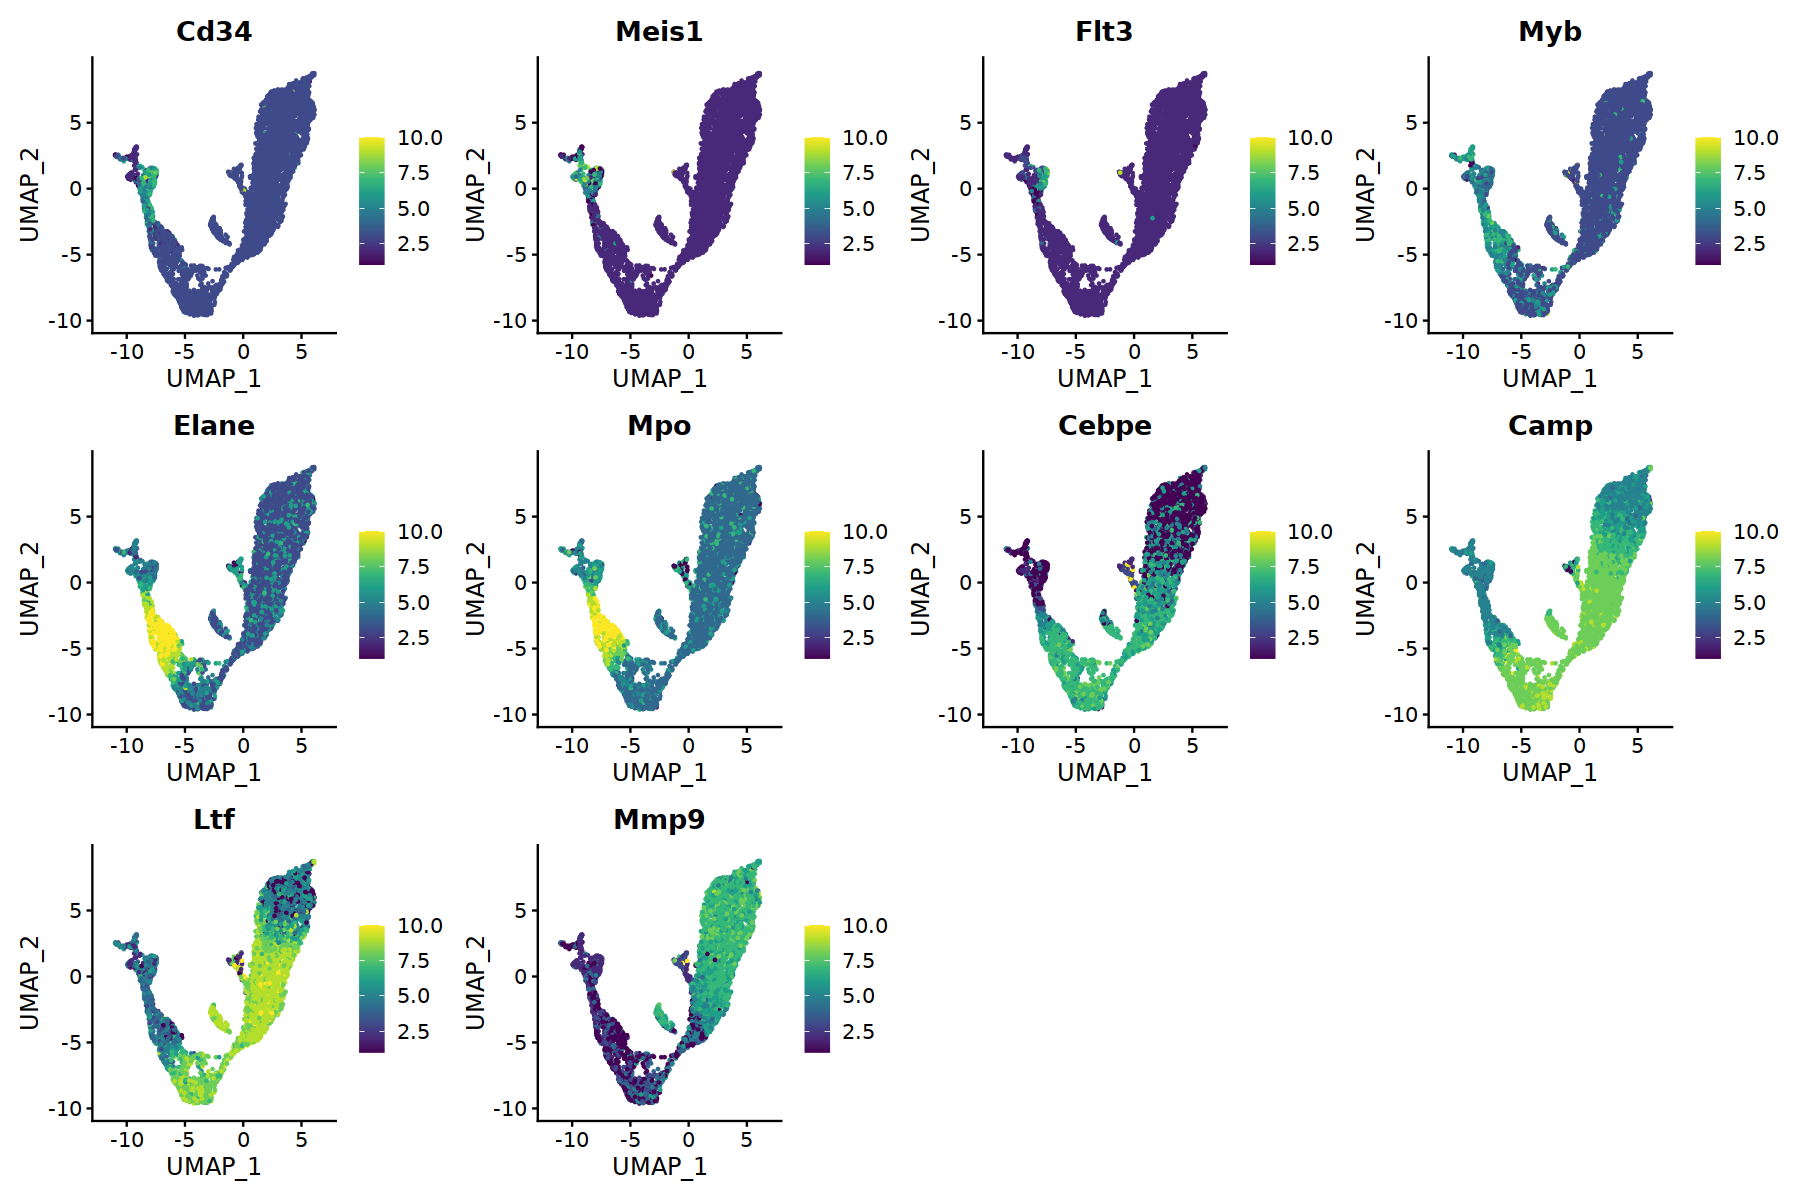

In [85]:
options(repr.plot.width=15, repr.plot.height=10)
FeaturePlot(neutrophils, c("Cd34", "Meis1", "Flt3", "Myb", 
                           "Elane", "Mpo", "Cebpe", 
                           "Camp", "Ltf", "Mmp9"),
            col=viridis(10))
dev.off()

In [112]:
saveRDS(neutrophils, "../intermediate_files/210421_xie_neutrophils.rds")

## Pseudotime for Xie et al data

In [2]:
neutrophils = readRDS("../intermediate_files/210421_xie_neutrophils.rds")

In [61]:
# rename clusters 5 and 8 to be the same since I want all cells to be included 
new.cluster.ids <- c(0, 1, 2, 3, 4, 5, 6, 7, 5, 9)
names(new.cluster.ids) <- levels(neutrophils)
neutrophils <- RenameIdents(neutrophils, new.cluster.ids)

Using full covariance matrix



null device 
          1

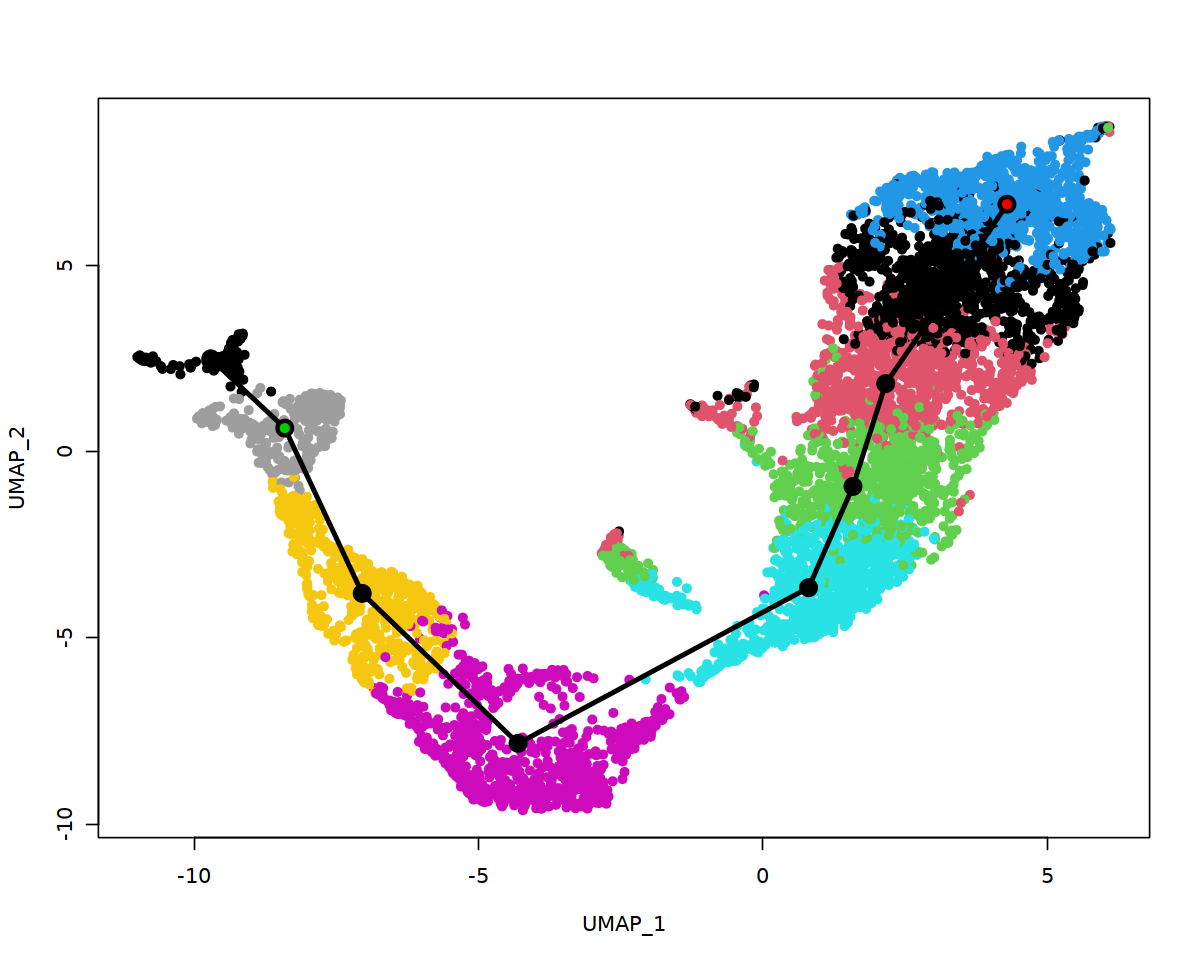

In [68]:
clusts = as.factor(neutrophils@active.ident)
rd1 = FetchData(neutrophils, c("UMAP_1", "UMAP_2"))[,c("UMAP_1", "UMAP_2")]
lin1 <- getLineages(rd1, clusts, start.clus = 7, end.clus=3)
plot(rd1, col = clusts, pch=16)
lines(lin1, lwd = 3, col = 'black', show.constraints=TRUE)
crv1 <- getCurves(lin1)
dev.off()

In [112]:
options(repr.plot.width=10, repr.plot.height=8)

df = cbind(rd1, clusts)
#png("../plots/Fig3F.png", width=800, height=600)
ggplot() + geom_point(data=df, aes(x=UMAP_1, y=UMAP_2, col=clusts), size=0.1) +
geom_point(data=as.data.frame(crv1@curves$curve1$s), aes(x=UMAP_1, y=UMAP_2), size=0.25) + theme_bw() +
    theme(panel.border = element_blank(), 
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      axis.line = element_line(colour = "black", size=0.25),
      text = element_text(size = 6),
      plot.title = element_text(size=8),
     axis.title  = element_blank(),
     axis.text =element_blank(),
     axis.ticks = element_blank(),
     legend.position="None")
dev.off()
dev.off()

png 
  2

null device 
          1

In [70]:
pseudotime_vals = as.data.frame(slingPseudotime(crv1))
plot_loess = function(gene, s=0.2) {
  df = na.omit(cbind(pseudotime_vals[,"curve1"], gene, 
                     FetchData(neutrophils, c(gene, "orig.ident", "seurat_clusters"))))
  colnames(df) = c("pt", "gene", "gene_exp", "samp", "clusters")
  return(ggplot(df, aes(x=pt, y=gene_exp)) + geom_point(aes(color=clusters)) + 
         geom_smooth() + xlab("Pseudotime") + ylab(gene))
}

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



null device 
          1

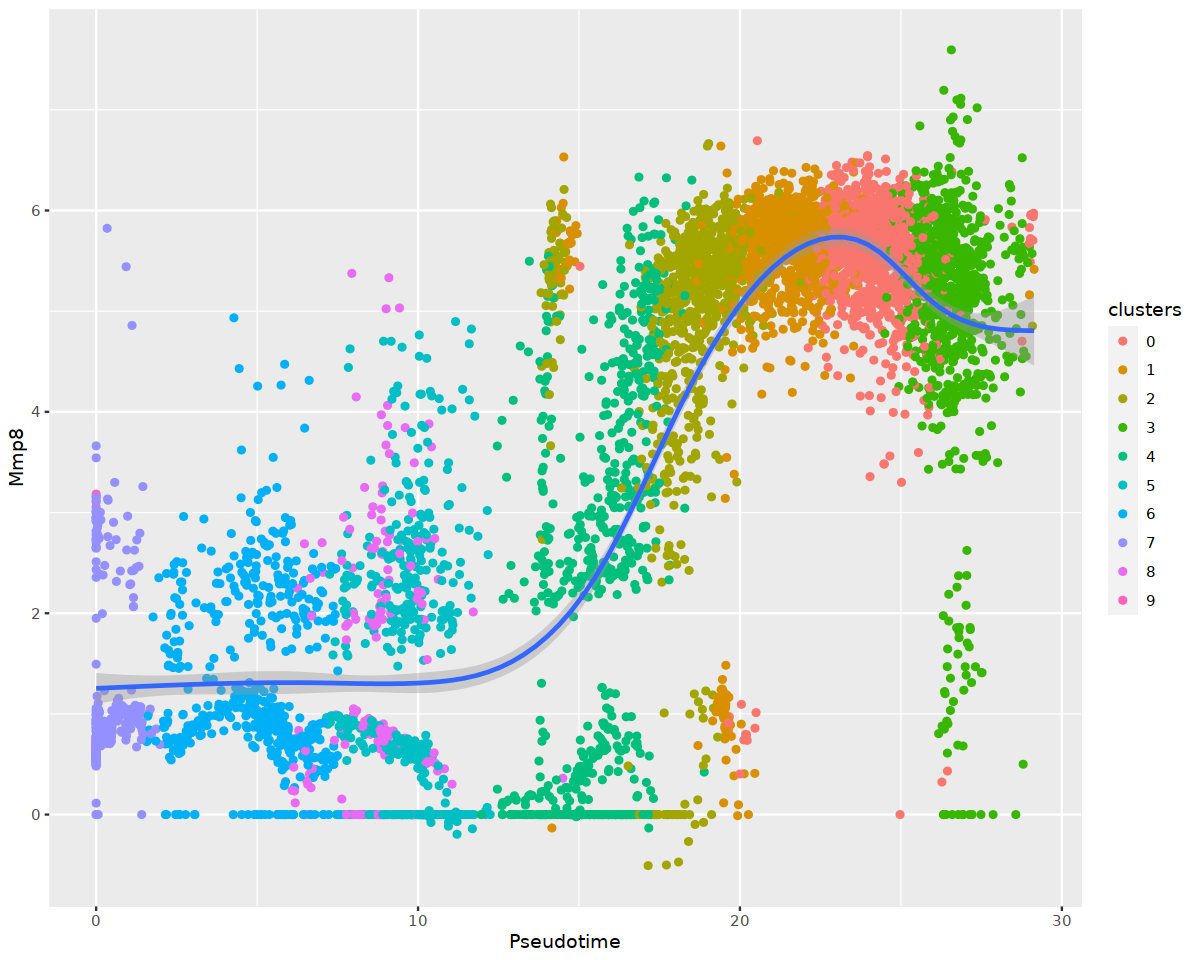

In [121]:
p = plot_loess("Mmp8")
p
dev.off()

In [86]:
plot_loess_genes = function(genes, s=0.2) {
  df_lists = list()
  for (gene in genes) {
      df = na.omit(cbind(pseudotime_vals[,"curve1"], gene, 
                         FetchData(neutrophils, c(gene, "orig.ident", "seurat_clusters"))))
      colnames(df) = c("pt", "gene", "gene_exp", "samp", "clusters")
      df$gene_exp[df$gene_exp < 0] = 0
      df_lists[[gene]] = df
  }
  genes_df = do.call(rbind, df_lists)
  p = ggplot(genes_df, aes(x=pt, y=gene_exp)) + 
    facet_grid(rows = vars(gene), scales = "free") + 
    #geom_smooth(fill="red")+ 
    #geom_point(alpha=0.1) + 
    geom_col(aes(col=clusters), width=0.005, position = "dodge") +
    xlab("Pseudotime") + ylab("Expression") + 
    theme_classic() + 
    theme(strip.text.y = element_text(angle = 0)) + 
    scale_fill_manual(values=brewer.pal(6,"Set1"))
    return(p)
}

Warning message:
"position_dodge requires non-overlapping x intervals"
Warning message:
"position_dodge requires non-overlapping x intervals"
Warning message:
"position_dodge requires non-overlapping x intervals"
Warning message:
"position_dodge requires non-overlapping x intervals"
Warning message:
"position_dodge requires non-overlapping x intervals"
Warning message:
"position_dodge requires non-overlapping x intervals"
Warning message:
"position_dodge requires non-overlapping x intervals"
Warning message:
"position_dodge requires non-overlapping x intervals"
Warning message:
"position_dodge requires non-overlapping x intervals"
Warning message:
"position_dodge requires non-overlapping x intervals"


null device 
          1

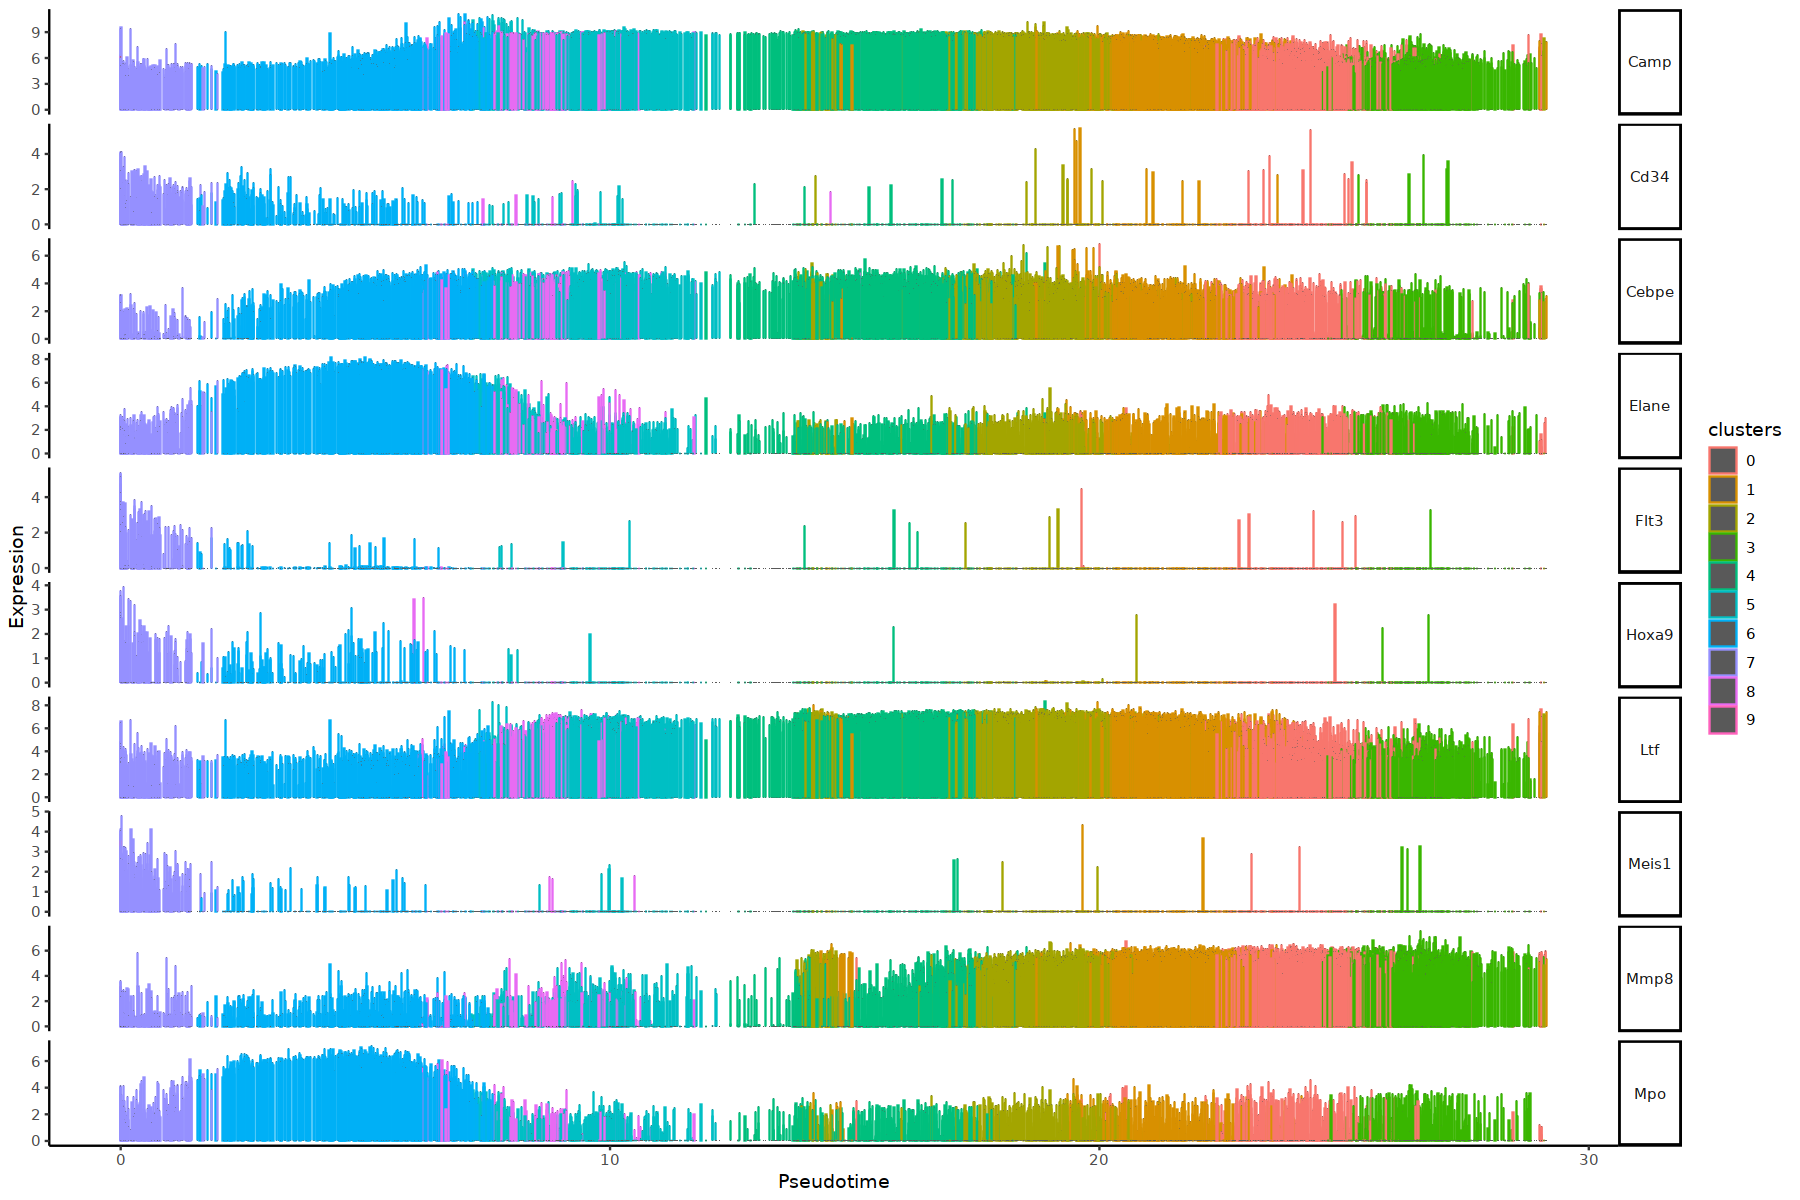

In [87]:
p1 = plot_loess_genes(c("Hoxa9", "Meis1", "Flt3", "Elane", "Mpo", "Cd34", "Cebpe", "Camp",  "Ltf", "Mmp8"))
p1
dev.off()

## Correlations between bulk RNAseq and scRNAseq data

In [73]:
# Correlations
head(pseudotime_vals)

,curve1,curve2
,<dbl>,<dbl>
AAACCTGAGCCCAGCT_1,26.870584,NA
AAACCTGAGCGCCTTG_1,10.238546,NA
AAACCTGCACCAGGCT_1,4.483661,NA
AAACCTGCAGCCTTTC_1,23.333995,NA
AAACCTGGTGTCCTCT_1,1.159961,2.028276
AAACCTGTCATTTGGG_1,5.358249,NA


In [74]:
neutrophils_norm = as.data.frame(GetAssayData(neutrophils@assays$integrated))
head(neutrophils_norm)

,AAACCTGAGCCCAGCT_1,AAACCTGAGCGCCTTG_1,AAACCTGCACCAGGCT_1,AAACCTGCAGCCTTTC_1,AAACCTGGTGTCCTCT_1,AAACCTGTCATTTGGG_1,AAACCTGTCTTGCCGT_1,AAACGGGAGGACGAAA_1,AAACGGGCAAGCGCTC_1,AAACGGGCACTGTGTA_1,⋯,TTTGGTTTCGGAATCT_2,TTTGGTTTCTACTATC_2,TTTGTCAAGATCCCAT_2,TTTGTCAAGGAACTGC_2,TTTGTCACAGCTCGCA_2,TTTGTCACATAAAGGT_2,TTTGTCAGTAAGTGTA_2,TTTGTCAGTATGGTTC_2,TTTGTCATCATCTGTT_2,TTTGTCATCCAGGGCT_2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mrpl15,-0.1333749,1.8723511,2.117845,-0.15847330,1.952313,1.65377618,2.109529552,-0.346906273,-0.14719274,-0.20853969,⋯,0.000000,0.000000,0,0.000000,2.365358,0.000000,0.000000,2.025489,0,3.430317
Lypla1,-0.1013510,0.3827910,2.029845,-0.03790374,2.430434,0.34840777,0.400502980,0.137000577,0.01466841,0.19489688,⋯,0.000000,2.627582,0,2.658134,1.761975,2.960189,0.000000,0.000000,0,0.000000
Gm37988,0.0000000,0.0000000,0.000000,0.00000000,0.000000,0.04707327,0.009402835,0.000000000,0.00000000,0.00000000,⋯,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
Tcea1,-0.1244663,-0.2359781,1.798499,0.18263442,1.915963,1.82798046,1.085792628,0.007587512,-0.30983206,0.29490678,⋯,2.455566,0.000000,0,0.000000,1.761975,0.000000,0.000000,2.025489,0,0.000000
Atp6v1h,0.2562608,2.0058967,1.711106,-0.01945158,1.368486,-0.21720679,1.301188255,-0.017233937,-0.05129246,-0.03092998,⋯,0.000000,0.000000,0,2.658134,0.000000,0.000000,0.000000,2.025489,0,0.000000
Rb1cc1,2.5854319,-0.6379019,1.336330,0.57897565,1.704002,1.60362944,-0.481488261,-0.137928193,-0.54324111,2.12820016,⋯,0.000000,0.000000,0,2.658134,0.000000,0.000000,3.864853,2.025489,0,3.430317


In [75]:
pseudotime_ordered = pseudotime_vals[order(pseudotime_vals$curve1),]
pseudotime_ordered = pseudotime_ordered[!is.na(pseudotime_ordered$curve1),]
head(pseudotime_ordered)
tail(pseudotime_ordered)

,curve1,curve2
,<dbl>,<dbl>
AACACGTCAGATGGGT_1,0,0.000000
AACGTTGTCCGCAAGC_1,0,3.498423
AACTCAGAGGCTAGAC_1,0,0.000000
AACTCAGAGTCTTGCA_1,0,3.386348
AACTCTTCACCGCTAG_1,0,3.586813
AACTTTCGTAGCCTAT_1,0,0.000000


,curve1,curve2
,<dbl>,<dbl>
GAGTCCGCATGTTCCC_2,29.07334,NA
TTTATGCGTCATATCG_2,29.08579,NA
GACACGCTCCGGCACA_2,29.10133,NA
CTACGTCAGGGTGTTG_2,29.11229,NA
AAACCTGGTTCCTCCA_2,29.12187,NA
CTCATTAAGAAACGCC_2,29.13841,NA


In [76]:
pseudo_means = list()
for (i in seq(1,ceiling(max(pseudotime_ordered$curve1)))) {
    z = pseudotime_ordered$curve1
    genes = rownames(pseudotime_ordered[(z >= i-1) & (z < i),])
    pseudo_means[[i]] = apply(neutrophils_norm[,genes],1,mean, na.rm=TRUE)
}

In [13]:
# get BRQ and E2 bulk data
brq_e2_data = read.csv("../intermediate_files//210421_633_brq_e2w_rnaseq_log_cpm.csv")
head(brq_e2_data)

,BRQ_0h_rep1,BRQ_0h_rep2,BRQ_2h_rep1,BRQ_2h_rep2,BRQ_4h_rep1,BRQ_4h_rep2,BRQ_6h_rep1,BRQ_6h_rep2,BRQ_8h_rep1,BRQ_8h_rep2,⋯,X633_E2w_36h_rep1,X633_E2w_36h_rep2,X633_E2w_48h_rep1,X633_E2w_48h_rep2,X633_E2w_72h_rep1,X633_E2w_72h_rep2,X633_E2w_96h_rep1,X633_E2w_96h_rep2,X633_E2w_120h_rep1,X633_E2w_120h_rep2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mrpl15,6.713146,6.520037,6.536072,6.486532,6.670286,6.634415,6.221050,6.150138,5.894309,5.929673,⋯,6.535348,6.465442,6.148400,6.160432,5.400269,5.721165,4.973701,4.724085,4.942570,5.156600
Lypla1,6.334280,6.275615,6.407374,6.349148,6.577926,6.501551,6.324821,6.331994,6.318540,6.338262,⋯,7.021458,6.910749,6.890058,7.122950,7.023488,7.136403,7.031072,6.877112,6.985250,6.889528
RP24-426M1.3,4.997911,5.021264,5.153718,5.121053,5.270519,5.243147,5.134315,5.155950,5.029568,4.993949,⋯,5.106281,5.080913,4.937943,5.121040,4.873773,4.964717,5.046954,4.755924,4.936216,4.830166
Tcea1,7.292051,7.235587,7.329929,7.364407,7.319898,7.327297,7.215142,7.146185,6.927843,7.079222,⋯,7.426865,7.373496,7.059390,7.339118,6.849130,6.939185,7.013781,6.646117,6.669542,6.705267
Gm6104,3.963615,3.964461,3.994192,4.083038,4.140236,4.004925,4.238743,4.222944,3.780851,4.220393,⋯,3.469746,3.487318,3.227843,3.353461,2.819287,2.888675,1.829393,1.943217,-1.257469,-1.406029
Atp6v1h,6.296935,6.322661,6.197034,6.179970,6.144644,6.131141,6.225907,6.075413,6.035190,6.017780,⋯,6.733229,6.740717,6.697961,6.794731,6.772076,6.902699,7.130321,6.928719,7.298243,7.413832


In [150]:
v = apply(brq_e2_data[,1:38],1,var)
brq_e2_data_highvar = brq_e2_data[names(v[order(-v)]),][1:1000,]

In [151]:
bulk_tx = list()
for (tx in names(brq_e2_data_highvar[,1:38])) {
    cor_vals = c()
    for (i in seq(1,ceiling(max(pseudotime_ordered$curve1)))) {
        genes = rownames(brq_e2_data_highvar)[which(rownames(brq_e2_data_highvar) %in% names(pseudo_means[[i]]))]
        cor_vals = c(cor_vals,
                     cor.test(brq_e2_data_highvar[genes,tx], 
                              pseudo_means[[i]][genes])$estimate[[1]])
    }
    bulk_tx[[tx]] = cor_vals
}

bulk_tx_df = as.data.frame(bulk_tx)
rownames(bulk_tx_df) = seq(1,30)
head(bulk_tx_df)

,BRQ_0h_rep1,BRQ_0h_rep2,BRQ_2h_rep1,BRQ_2h_rep2,BRQ_4h_rep1,BRQ_4h_rep2,BRQ_6h_rep1,BRQ_6h_rep2,BRQ_8h_rep1,BRQ_8h_rep2,⋯,X633_E2w_24h_rep1,X633_E2w_24h_rep2,X633_E2w_36h_rep1,X633_E2w_36h_rep2,X633_E2w_48h_rep1,X633_E2w_48h_rep2,X633_E2w_72h_rep1,X633_E2w_72h_rep2,X633_E2w_96h_rep1,X633_E2w_96h_rep2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.13799431,0.13217249,0.12240759,0.12497507,0.13398969,0.14512045,0.13898855,0.13519405,0.12936361,0.12325702,⋯,0.2021181,0.2016671,0.2086787,0.2057094,0.2298813,0.2226642,0.2905762,0.2978891,0.2832753,0.2831340
2,0.10409311,0.10467918,0.09141443,0.09827648,0.10526894,0.11477958,0.11157891,0.11108126,0.10146374,0.09608904,⋯,0.2489219,0.2501299,0.2760046,0.2714934,0.3210859,0.3115923,0.4038297,0.4109690,0.3759197,0.3809403
3,0.09416885,0.09147897,0.07895764,0.08422453,0.09147672,0.10137859,0.09580544,0.09246442,0.08082889,0.07717947,⋯,0.2908154,0.2932117,0.3377444,0.3304162,0.3883012,0.3771959,0.4545977,0.4630040,0.3979131,0.4092323
4,0.08370097,0.07832390,0.06658276,0.07274301,0.07799736,0.08730398,0.07961077,0.08017737,0.06870319,0.06377744,⋯,0.3070237,0.3090777,0.3651000,0.3564064,0.4175826,0.4032248,0.4708035,0.4791991,0.4023367,0.4165782
5,0.06825070,0.06208857,0.05388469,0.05855547,0.05987807,0.07167637,0.06134795,0.06368077,0.05435090,0.04808288,⋯,0.3114383,0.3125682,0.3807780,0.3702218,0.4371133,0.4199750,0.4845768,0.4906614,0.4079955,0.4252388
6,0.05097434,0.04583897,0.03829004,0.04148713,0.04210718,0.05319268,0.04380706,0.04847202,0.03892750,0.03357143,⋯,0.2981112,0.2980796,0.3732869,0.3623673,0.4355021,0.4169320,0.4901027,0.4938523,0.4150613,0.4329036


In [152]:
apply(bulk_tx_df,2,function(x) matrixStats::weightedMedian(1:30, x))

BRQ_0h_rep1       BRQ_0h_rep2       BRQ_2h_rep1       BRQ_2h_rep2 
         3.122418          3.003071          2.842788          2.929425 
      BRQ_4h_rep1       BRQ_4h_rep2       BRQ_6h_rep1       BRQ_6h_rep2 
         2.870049          3.094571          2.850856          3.015748 
      BRQ_8h_rep1       BRQ_8h_rep2      BRQ_12h_rep1      BRQ_12h_rep2 
         2.786349          2.702504          2.255788          2.193104 
     BRQ_24h_rep1      BRQ_24h_rep2      BRQ_48h_rep1      BRQ_48h_rep2 
         2.901940          2.917834          9.467901          9.534716 
     BRQ_72h_rep1      BRQ_72h_rep2      BRQ_96h_rep1      BRQ_96h_rep2 
         9.891167          9.783839          6.465891          5.662847 
 X633_E2w_0h_rep1  X633_E2w_0h_rep2  X633_E2w_4h_rep1  X633_E2w_4h_rep2 
         6.137345          7.408037          5.835473          4.687574 
 X633_E2w_8h_rep1  X633_E2w_8h_rep2 X633_E2w_12h_rep1 X633_E2w_12h_rep2 
         7.471327          6.663070         10.343519          9.747969 
X633_E2w_24h_rep1 X633_E2w_24h_rep2 X633_E2w_36h_rep1 X633_E2w_36h_rep2 
        11.984443         11.976112         12.928655         12.734920 
X633_E2w_48h_rep1 X633_E2w_48h_rep2 X633_E2w_72h_rep1 X633_E2w_72h_rep2 
        13.815114         13.656804         15.247851         15.049055 
X633_E2w_96h_rep1 X633_E2w_96h_rep2 
        16.183737         16.055002

In [248]:
y_vals = c()
for (i in seq(19,1)) {
    y_vals = c(y_vals, c(i,i))
}

medians_df = as.data.frame(cbind(y_vals, apply(bulk_tx_df,2,function(x) matrixStats::weightedMedian(1:30, x))))
colnames(medians_df) = c("tp", "wm")
medians_df$tx = as.character(c(rep("BRQ", 20), rep("-E2", 18)))
medians_df$tx <- factor(medians_df$tx, levels = c("BRQ", "-E2"))

In [249]:
gene_lists = list()
for (gene in c("Cd34","Meis1", "Mpo", "Elane", "Ltf", "Mmp8")) {
    df = na.omit(cbind(pseudotime_vals[,"curve1"], gene, 
                 FetchData(neutrophils, c(gene))))
    colnames(df) = c("pt", "gene", "gene_exp")
    #df$gene_exp = df$gene_exp/quantile(df$gene_exp, 0.94)
    gene_lists[[gene]] = df
}
final_list = do.call(rbind, gene_lists)
dim(final_list)

[1] 35394     3

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
"Removed 15828 rows containing non-finite values (stat_smooth)."


null device 
          1

ERROR: Error in dev.off(): cannot shut down device 1 (the null device)


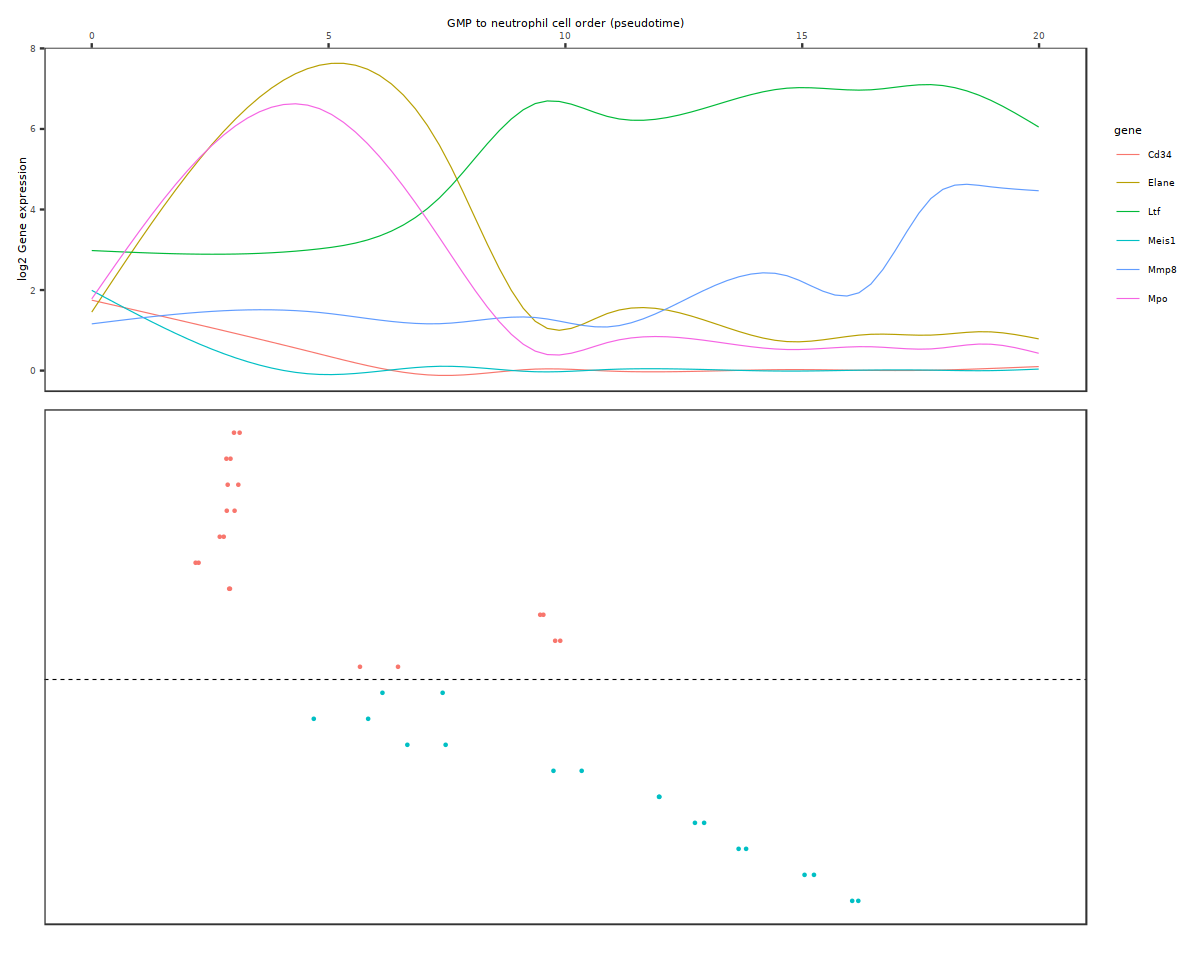

In [257]:
p1 = ggplot(final_list,aes(x = pt, y = gene_exp)) +
  geom_smooth(aes(colour = gene),se = F, size=0.25) + 
  theme_bw() + scale_x_continuous(position = "top", limits=c(0,20)) + 
  labs(x="GMP to neutrophil cell order (pseudotime)", y="log2 Gene expression") +
  theme(panel.grid.minor = element_blank(),
        panel.grid.major = element_blank(),
       text = element_text(size = 6))
#       legend.position = "None")
p2 = ggplot(data=medians_df, aes(x=wm, y=tp)) + 
    geom_point(aes(color=tx), size=0.25) + xlim(c(0,20)) + 
    theme_bw() + geom_hline(yintercept=c(9.5),linetype="dashed", size=0.25) +
    labs(x="", y="") +
    theme(panel.grid.minor = element_blank(),
          panel.grid.major = element_blank(),
          axis.text.y = element_blank(),
          axis.ticks.y = element_blank(),
         axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        text = element_text(size = 6),
        legend.position = "None")

#pdf("../plots/fig3f.pdf", width=2, height=3)
p1 / p2 + plot_layout(heights = c(2,3))
dev.off()
dev.off()

null device 
          1

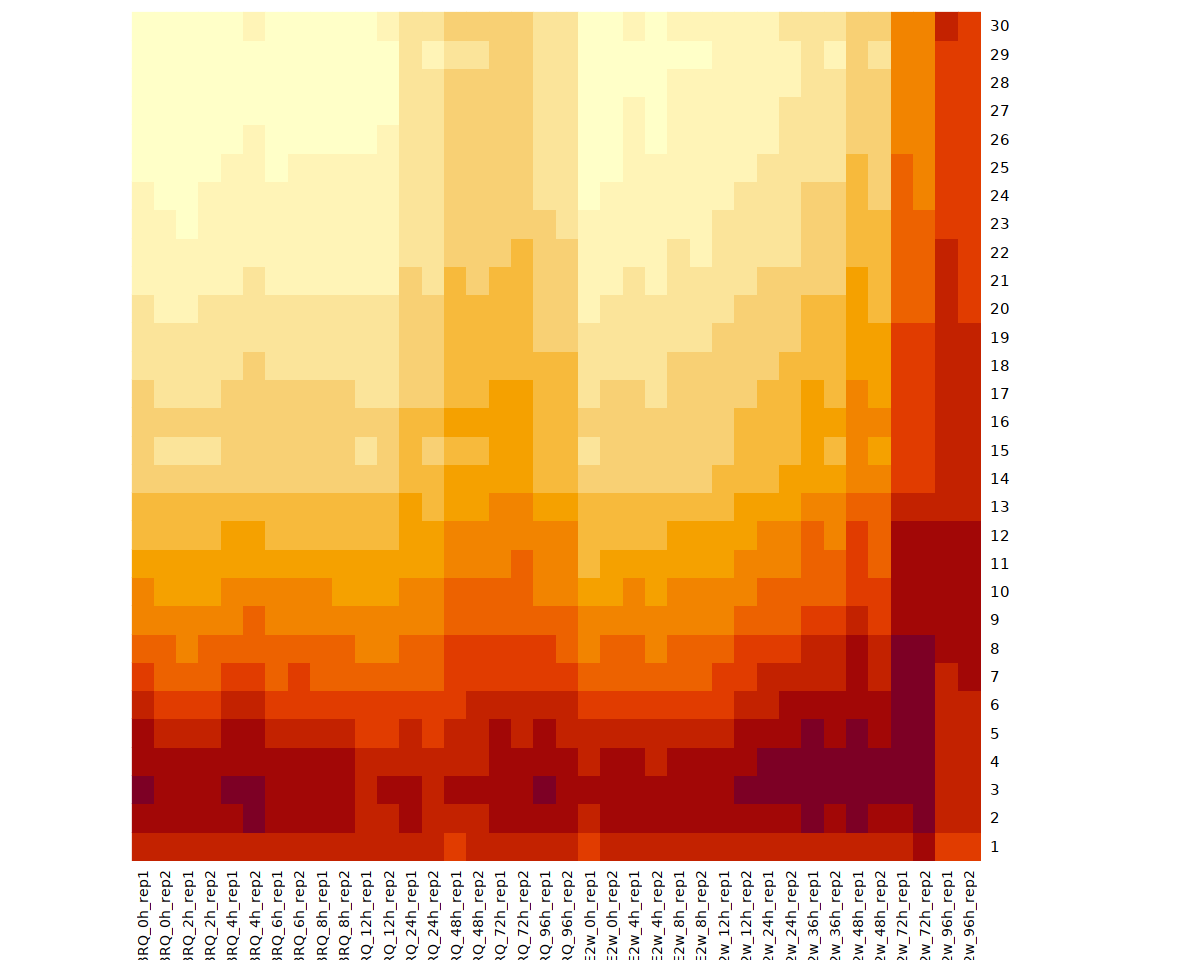

In [101]:
heatmap(as.matrix(bulk_tx_df), Rowv=NA, Colv=NA, scale="none")
dev.off()